# Ridge Regression (a.k.a L2 Regularization)

## Overview

The purpose of this module is to examine ridge regression. Ridge regression is an attempt to avoiding overfitting during linear regression.

As an example to motivate the discussion, recall the linear regression model of an unusually high order polynomial, to data that can be fit well with a linear or low order polynomial. This is the classic example of over fitting data. We notice with a high order polynomial fit, say degree 15, that the polynomial fits the training data very well, but the undulations of the curve that make the fit very well, don't generalize well to new data.

Let us ask the question "can we determine a model is overfit by looking at the coefficients?" The answer is yes. First, we must make sure we rescale our data so that our xvalues vary from 0 to 1. After rescaling, we notice that a high order polynomial model must have very large coefficients on the high order polynomial terms. For example, x^15 will map a number (between zero and one) to an extremely small number. Thus, the coefficient must become extremely large for it to be non negligible. 

Therefore, after rescaling, the indication of an overfit line will be extremely large coefficients. In order to minimize the overfitting, we could "devalue" the terms with large coefficients (If we were only talking about a polynomial fit, we could just eliminate the higher order terms, but in a more general sense, if we have a large number of features that we want to include, we would have to resort to devaluing the terms that are contributing to the overfitting). 

In order to devalue the terms with large coefficients, we redefine our cost function (scoring metric). With "normal" linear regression, our cost function was the residual sum of squares (RSS), where low values indicate a good fit. In order to devalue the overfitting terms, we redefine our cost function to be equal to RSS plus a measure of the magnitude of coefficients. We have two reasonable options for the measure of magnitudes of the coefficients: the L1 norm (sum of magnitudes) or the L2 norm squared (the L2 norm is the square root of the sum of squares, so the L2 squared is the sum of squares).

In Ridge Regression, we choose the L2 norm squared (Lasso uses the L1 squared). Thus, we define the cost function to be the RSS plus a constant (alpha) times the L2 squared. We use the constant alpha to increase or decrease the effect of devaluing term (L2 squared). Notice that as alpha goes to zero, the model approaches the "normal" linear regression (which may be overfit). On the other hand, letting alpha approach infinity, forces the coefficients to approach zero in order to minimize the cost function since, although the RSS may be large, it is bounded, whereas the devaluing term is not. So to minimize the unbounded term, the coefficients must approach zero.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import random
import math
%matplotlib inline

## The Data
We will generate a random set of x values. The y values will be sin(4x), with some noise added to it.

In [9]:
#Create a random set of n x-values in the range [0,1)
random.seed(98103)
n=30
x=[random.random() for i in range(n)]

In [10]:
x.sort()
xseries=pd.Series(x)

In [11]:
#Create y values
yseries=xseries.apply(lambda x: math.sin(4*x))

In [12]:
#Add some random Guasian noise to the data
random.seed(1)
noise=pd.Series([random.gauss(0,1.0/3.0) for i in range(n)])
yseries=yseries+noise

## Plot the Data

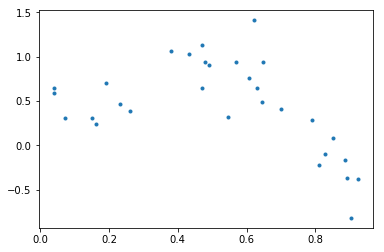

In [13]:
plt.plot(xseries,yseries,".")

## Our Models

In [14]:
#Define a function that takes an array feature and a maximal degree, then returns a data frame with the original feature as
#the first column, then each subsequent column is the data of the first raised to increasing integer powers, up to the
#maximal degree
def polynomial_df(series,maxdegree):
    poly_df=pd.DataFrame({"x":series})
    for degree in range(2,maxdegree+1):
        poly_df["x^"+str(degree)]=series**degree
    return poly_df

## Ordinary Linear Regression

In [15]:
#Create our x-values data frame with polynomial features up to degree 15
X_poly15=polynomial_df(xseries,15)

In [16]:
X_poly15.head()

,x,x^2,x^3,x^4,x^5,x^6,x^7,x^8,x^9,x^10,x^11,x^12,x^13,x^14,x^15
0,0.039579,0.001566,0.000062,0.000002,9.712277e-08,3.844017e-09,1.521421e-10,6.021625e-12,2.383296e-13,9.432833e-15,3.733416e-16,1.477647e-17,5.848369e-19,2.314723e-20,9.161429e-22
1,0.041568,0.001728,0.000072,0.000003,1.241083e-07,5.158947e-09,2.144476e-10,8.914179e-12,3.705455e-13,1.540287e-14,6.402681e-16,2.661473e-17,1.106324e-18,4.598777e-20,1.911624e-21
2,0.072432,0.005246,0.000380,0.000028,1.993659e-06,1.444046e-07,1.045951e-08,7.576024e-10,5.487462e-11,3.974675e-12,2.878935e-13,2.085269e-14,1.510401e-15,1.094013e-16,7.924146e-18
3,0.150289,0.022587,0.003395,0.000510,7.667197e-05,1.152296e-05,1.731774e-06,2.602667e-07,3.911523e-08,5.878591e-09,8.834878e-10,1.327785e-10,1.995516e-11,2.999042e-12,4.507231e-13
4,0.161334,0.026029,0.004199,0.000677,1.093028e-04,1.763428e-05,2.845012e-06,4.589975e-07,7.405197e-08,1.194711e-08,1.927477e-09,3.109678e-10,5.016973e-11,8.094091e-12,1.305853e-12


In [340]:
olr=LinearRegression().fit(X_poly15,yseries)

In [341]:
olr.coef_

array([  1.68855017e+03,  -5.21795543e+04,   9.06187315e+05,
        -1.01385803e+07,   7.81815884e+07,  -4.30158915e+08,
         1.72002969e+09,  -5.04552140e+09,   1.08860248e+10,
        -1.71957853e+10,   1.96084214e+10,  -1.56882427e+10,
         8.34643053e+09,  -2.64973280e+09,   3.79636460e+08])

We see that the higher order terms have large coefficients, on the order of e10

In [56]:
y_predict_olr=olr.predict(X_poly15)

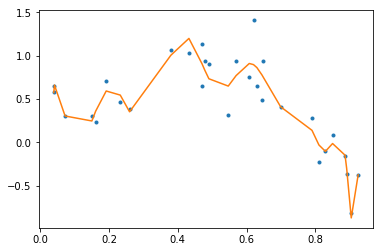

In [57]:
plt.plot(xseries,yseries,".",xseries,y_predict_olr,"-")

Overfit indeed! Let us now try ridge regression to see how devaluaing the coefficients effects the behavior.

## Ridge Regression

In [73]:
#Lets fit three models with varying values of alpha
alpha_list=[0.0000001,1,100]
model_list=[]
for alpha in alpha_list:
    model=Ridge(alpha).fit(X_poly15,yseries)
    model_list.append(model)
    
ridge_prediction_list=[]
for model in model_list:
    ridge_prediction_list.append(model.predict(X_poly15))

In [74]:
for i in range(3):
    print("Alpha: {}".format(alpha_list[i]))
    print(model_list[i].coef_)
    print("\n\n")

Alpha: 1e-07
[ -14.66475488   88.69968365 -171.16123929   58.4967547   105.79342795
   14.7418639   -65.28934227  -73.01892413  -27.18121634   26.17448169
   52.33915368   41.91673286    7.97373048  -23.55537617  -23.5983747 ]



Alpha: 1
[ 0.25431787 -0.02425041 -0.19823775 -0.2716715  -0.28880526 -0.27830806
 -0.2556759  -0.22885783 -0.20179574 -0.17634126 -0.15326196 -0.13276976
 -0.11480028 -0.09916148 -0.0856123 ]



Alpha: 100
[-0.01595971 -0.02255494 -0.02442097 -0.02399888 -0.02255679 -0.02072469
 -0.01880958 -0.01695701 -0.01523138 -0.01365625 -0.01223473 -0.01096007
 -0.00982118 -0.00880544 -0.00790019]





We see that increasing the alpha perameter greatly subdues the coefficients of the higher order terms and brings them down to the same order of magnitude of the lower power terms. We also see that (in this case) we need to make alpha really small before it even starts to look like the ordinary linear regression model.

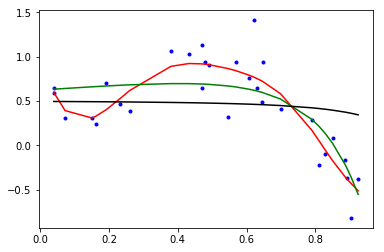

In [75]:
plt.figure()
plt.plot(xseries,yseries,".",color="blue")
plt.plot(xseries,ridge_prediction_list[0],"-",color="red")
plt.plot(xseries,ridge_prediction_list[1],"-",color="green")
plt.plot(xseries,ridge_prediction_list[2],"-",color="black")

## Optimizing Alpha via Cross Validation

We may optimize alpha by splitting our data into three groups: training data, validation data, and test data. The test data is set aside at the start and is not used until we are finished optimizing our model.

In order to optimize our model, we chose a particular alpha value and train our regression model with the training data, then test it on the validation set. We record a score of the model (possibly RSS). Then we repeat this process with a different alpha value, for as many alpha values as we wish. When we are done testing alphas, we select the alpha model that gave us the best score. Finally, we test our model with the chosen alpha on the test set.

### k-fold Cross Validation
If the data set is small, which is sometimes the case, splitting our data set into three groups (train, validation, and test) will decrease the size of our already small sets. We may not have the numbers to get accurate predictions. To remedy this, we use a method called k-fold cross validation. 

The first step is to separate a test set from the rest of the data. The rest of the data will be the train/validation set. Then we separate the train/valid data into k groups. We chose one of the groups to be the validation set and the other k-1 groups becomes our training data. We train our data, with a particular alpha value, on this training set and "test" it on the validation set to obtain a score (possibly RSS). Then, amongst the k groups defined earlier, we choose a different group as the validation set and use the other k-1 groups as the training data. We train our model and test it on the validation set to obtain a different score for that same alpha. We repeat this process for each of the k groups, obtaining a different score for each of them. Finally, we take the average of the score and associate it with that particular alpha value.

We may repeat this process for many values of alpha, and try to determine the best value for alpha. Once we have made our choice, we may test our model with the chosen alpha on our test data.

The final question is what should k be? The best number is k=N, where N is the number of our training points (This is called the leave-one-out method). However, the larger the number of k, the more computationally costly it will be. If our data set is small enough to want to use cross validation, but large enough to not want to set k=N, it is common practice to use k=5 or k=10.


Since our data set is small, we should use the cross validation technique. In fact, it is small enough that we can use the leave-one-out method).

#### RidgeCV
We may use sklearn's efficient RidgeCV model. This model has a parameter alpha that can be set equal to an array of different alpha values to check. It also has a cv parameter that specifies the k fold value. The default value for cv is N (i.e. leave-one-out).

To learn about the other parameters, check out the online documentation.

##### Leave-One-Out

In [200]:
#Since our data is ordered, we should randomize it first. But we must randomize the x and y pairs together, so, let us first
#put our data into a data frame
XY=polynomial_df(xseries,15)
XY["y"]=yseries

#We can shuffle the data frame with the .sample() method. Setting the parameter frac equal to 1 specifies all rows
XY=XY.sample(frac=1)

In [207]:
Xoptimum=XY[XY.columns[XY.columns!="y"]]
yoptimum=XY.y

In [208]:
#Import the RidgeCV class and the train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split

In [209]:
#Split the data
X_train,X_test,y_train,y_test=train_test_split(Xoptimum,yoptimum)

In [210]:
#Define a list of alphas
my_alphas=[1e-10,1e-9,1e-8,1e-7,1e-6,1e-2,1,10,100]

In [235]:
#Instantiate and fit the object
ridge_regressor=RidgeCV(alphas=my_alphas,store_cv_values=True).fit(X_train,y_train)

In [213]:
#We can use the cv_values_ attribute to retriev the mean squared error for each alpha value. This attribute returns a matrix
#where the columns represent different alpha values and the rows represent the mean squared error for each fold
error_df=pd.DataFrame(ridge_regressor.cv_values_,index=X_train.index,columns=[str(i) for i in my_alphas])

In [214]:
error_df.mean()

1e-10    21.163290
1e-09    23.411393
1e-08    12.317552
1e-07     4.632570
1e-06     1.248126
0.01      0.089336
1         0.114568
10        0.165617
100       0.195386
dtype: float64

We see that alpha=0.01 has the minimum mean squared error. We will chose this value of alpha for our model. Let us see what our test error is and plot our function.

In [215]:
ridge_optimum=Ridge(alpha=0.01).fit(X_train,y_train)

In [216]:
def rss(ytrue,ypredict):
    return ((ytrue-ypredict)**2).sum()

In [218]:
mean_squared_error=rss(y_test,ridge_optimum.predict(X_test))/len(y_test)
mean_squared_error

0.06423282056035998

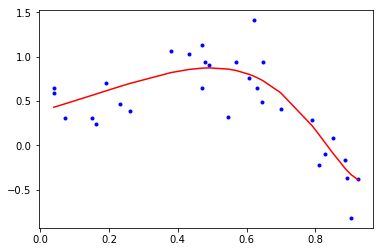

In [224]:
plt.figure()
plt.plot(xseries,yseries,".",color="blue")
plt.plot(xseries,ridge_optimum.predict(X_poly15),"-",color="red")

## Gradient Descent

We now will develop, "from scratch", the ridge regression algorithm and model via gradient descent. We have decided to use the L2 norm squared to penalize high coefficient values (see notes for a discussion). Having chosen this norm, we still have two options for the cost function: penalize the intercept, or not. First we will do the gradient descent that penalizes the intercept. Afterwards, we will exclude the intercept from the penalty term.

### Intercept Penalty

In [375]:
#Define a function that accepts a dataframe slice as feature values and returns a numpy array. The first column of the 
#matrix should be all ones (this is for the constant term). The function should also take, as input, a list of feature
#names. The output H matrix will have its columns in the same order they appear in the list.

def H_generator(x_data,col_list):
    #add the ones column
    data=x_data.copy()
    data["ones"]=1
    return np.array(data[["ones",]+col_list])

In [376]:
#Define a function that takes an H matrix, a y vector, the L2 penalty, and a w vector (initial values) and 
#outputs the gradient matrix

def gradient_generator(H,w,y,alpha):
    return -2*np.dot(np.transpose(H),y-np.dot(H,w))+2*alpha*w

In [399]:
#Define a function called "regressor" that performs the gradient descent algorithm. As inputs, it should take an H matrix,
#an initial w vector called w_not, a y vector, step size eta, convergence criterium epsilon, and max_iterations. 
#It should return the final w vector once it has converged or reached the max_iterations
def regressor(H,w_not,y,eta,epsilon,max_iterations,alpha):
    wn=w_not
    j=0
    while True:
        j+=1
        gradient=gradient_generator(H,wn,y,alpha)
        gradient_length=np.sqrt(abs(np.dot(gradient,gradient)))
        wn=wn-(eta*gradient)
        if gradient_length<epsilon or j>max_iterations:
            break
    print("Coef: {}\ny predict: {}\niterations: {}\ngradient_length: {}".format(wn,np.dot(H,wn),j,gradient_length))
    return(wn,np.dot(H,wn))

In [378]:
#Define the model that makes predictions
def manual_predict(w,x_data,col_list):
    H=H_generator(x_data,col_list)
    return np.dot(H,w)

In [379]:
#Define a residual sum of squares function:
def rss(y_true,y_prediction):
    return ((y_true-y_prediction)**2).sum()

Use the manually defined regressor to fit our data

In [387]:
column_list=list(X_poly15.columns)

In [388]:
Hmatrix=H_generator(X_poly15,column_list)

In [394]:
w_not=np.array([1,]*16)

In [403]:
ypredict_alpha1=regressor(Hmatrix,w_not,yseries,eta=0.01,epsilon=0.01,max_iterations=1000,alpha=1)[1]

Coef: [ 0.55298145  0.35513543 -0.003893   -0.20031976 -0.28092298 -0.29990901
 -0.28916052 -0.2654276  -0.23720193 -0.20867089 -0.1817969  -0.1573946
 -0.13569215 -0.11662668 -0.10000074 -0.08556502]
y predict: [ 0.5670181   0.56772176  0.57859968  0.60541631  0.6091053   0.6191145
  0.63184016  0.6397475   0.66683775  0.67216117  0.67220263  0.6721547
  0.67169455  0.67058876  0.65826006  0.64914156  0.6270394   0.61776996
  0.60947555  0.59531556  0.5935215   0.52429772  0.29889127  0.22205585
  0.13742731  0.02826427 -0.2123108  -0.24960576 -0.36108579 -0.55510915]
iterations: 238
gradient_length: 0.009941200056236478


In [441]:
#Find the RSS
rss(yseries,ypredict_alpha1)

2.5457114980279214

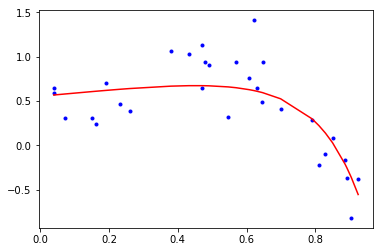

In [405]:
plt.figure()
plt.plot(xseries,yseries,".",color="blue")
plt.plot(xseries,ypredict_alpha1,"-",color="red")

Our curve looks remarkably similar to the one calculated with the sklearn ridge regressor. Note that the sklearn ridge regressor also includes the intercept in its calculations.

## Excluding the Intercept
To exclude the intercept, we need to make a slight modification to the gradient, and then to the regressor that uses a particular gradient

In [434]:
def gradient_generator2(H,w,y,alpha,include_intercept):
    if include_intercept:
        imod=np.identity(len(w))
        imod[0,0]=0
        return_gradient=-2*np.dot(np.transpose(H),y-np.dot(H,w))+2*alpha*np.dot(imod,w)
    else:
        return_gradient=-2*np.dot(np.transpose(H),y-np.dot(H,w))+2*alpha*w
    return return_gradient

In [435]:
def regressor2(H,w_not,y,eta,epsilon,max_iterations,alpha,include_intercept=False):
    wn=w_not
    j=0
    while True:
        j+=1
        gradient=gradient_generator2(H,wn,y,alpha,include_intercept)
        gradient_length=np.sqrt(abs(np.dot(gradient,gradient)))
        wn=wn-(eta*gradient)
        if gradient_length<epsilon or j>max_iterations:
            break
    print("Coef: {}\ny predict: {}\niterations: {}\ngradient_length: {}".format(wn,np.dot(H,wn),j,gradient_length))
    return(wn,np.dot(H,wn))

In [436]:
column_list=list(X_poly15.columns)

In [437]:
Hmatrix=H_generator(X_poly15,column_list)

In [438]:
w_not=np.array([1,]*16)

In [448]:
y2predict_alpha1=regressor2(Hmatrix,w_not,yseries,eta=0.01,epsilon=0.01,max_iterations=1000,alpha=1,
                           include_intercept=True)[1]

Coef: [ 0.62223106  0.25552387 -0.02411094 -0.19877413 -0.2726144  -0.28990472
 -0.27935626 -0.25651678 -0.2293827  -0.20193414 -0.17605162 -0.15252385
 -0.13157778 -0.11315953 -0.0970842  -0.08311547]
y predict: [ 0.63229363  0.63279591  0.64052899  0.65924912  0.66177133  0.66852348
  0.67685352  0.68182312  0.69568144  0.69522475  0.69108414  0.69093504
  0.68968955  0.68730073  0.66899314  0.65752146  0.63164335  0.62121094
  0.61200677  0.59651085  0.59456374  0.52117352  0.29148269  0.21449652
  0.13009762  0.02167703 -0.21607888 -0.25283128 -0.36256216 -0.55317054]
iterations: 239
gradient_length: 0.009967774712776923


In [449]:
#Find the RSS
rss(yseries,y2predict_alpha1)

2.601589843148389

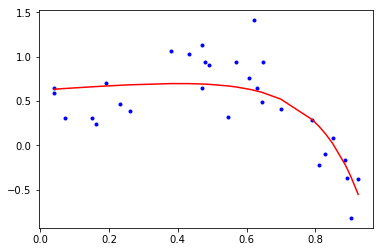

In [450]:
plt.figure()
plt.plot(xseries,yseries,".",color="blue")
plt.plot(xseries,y2predict_alpha1,"-",color="red")

We see that our intercept has been modified only slightly. Unfortunately, the rss is slightly higher